In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk
import contractions
import re

In [2]:
data = pd.read_excel("datajobsng.xlsx")
data

,Title,Description,Job Type (duration),Job Type (location),Job Type (contract),Industry,Location
0,Data Collection and Data Entry Specialist,We are currently seeking a dedicated and detai...,Not specified,Remote,Not specified,IT & Telecoms,Not specified
1,Data Science Tutor/Instructor,We are seeking a dynamic and experienced Data ...,Not specified,Not specified,Not specified,Education,Lagos
2,Senior Data Analyst,At iVisa we believe that traveling should be s...,Not specified,Remote,Not specified,IT & Telecoms,Not specified
3,Data Analyst,"A Data Analyst is responsible for collecting, ...",Not specified,Not specified,Not specified,IT & Telecoms,Lagos
4,Azure Engineer,Azure Data Engineers are responsible for desig...,Not specified,Not specified,Not specified,Tourism & Travel,Lagos
...,...,...,...,...,...,...,...
1726,Data Manager,ICT / Computer,Full Time,Not specified,Contract,Not specified,Lagos
1727,"Team Lead, Data Insights","Data, Business Analysis and AI",Full Time,Not specified,Not specified,Not specified,Lagos
1728,Data Analyst,"Data, Business Analysis and AI",Full Time,Not specified,Not specified,Not specified,Lagos
1729,Data Scientist,"Data, Business Analysis and AI",Full Time,Not specified,Not specified,Not specified,Lagos


In [36]:
import re

def remove_special_chars(text):
    if isinstance(text, str):  # Check if input is a string
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Let's remove special characters in the "Job Description" column of the data
data['Job Description'] = data['Job Description'].apply(lambda x: remove_special_chars(x))

data.head()

,Title,Job Description,Requirement(Skills),Requirement(Experience),Job_type,Location,Salary,Company,Industry
0,Database Administrator II,\n\n MAIN FUNCTIONS\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \nMay perform testing on databases in support of modifications or upgrades \nMakes recommendations for improvements to database \nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,"SQL, Databaase Management, Analytical skills",3 to 4 years as an IT Professional,Contract,NaN,NaN,NaN,NaN
1,Data Processor,\n\n Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,Computer Application Packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,\n\n Responsibilities\nFinding and growing client bases\nUpdating client bases\nWorking with the base of cold clients\nIncreasing sales volumes\nMaintaining regular contact with customers\nStudying competitive markets their trends and development\nNegotiating with clients\nWriting reports\n\nQualifications\nMust understand the Forex Market\nExperience in active sales\nObjection handling skills\nCommunication skills the ability to establish longterm relationships with clients\nExperience in finding client bases in the CIS and abroad will be a plus,"Understanding Forex Markets, Communication Skills,",3 to 4 years in active sales,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,\n\n As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n

In [37]:
import contractions

def replace_contractions(text):
    if isinstance(text, str):  # Check if input is a string
        return contractions.fix(text)
    else:
        return text  # Return input unchanged if it's not a string

# Let's fix the contractions in the data
data['Job Description'] = data['Job Description'].apply(lambda x: replace_contractions(x))

data.head()

,Title,Job Description,Requirement(Skills),Requirement(Experience),Job_type,Location,Salary,Company,Industry
0,Database Administrator II,\n\n MAIN FUNCTIONS\nUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \nMay perform testing on databases in support of modifications or upgrades \nMakes recommendations for improvements to database \nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONS\nPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORK\nLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENT\nPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,"SQL, Databaase Management, Analytical skills",3 to 4 years as an IT Professional,Contract,NaN,NaN,NaN,NaN
1,Data Processor,\n\n Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,Computer Application Packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,\n\n Responsibilities\nFinding and growing client bases\nUpdating client bases\nWorking with the base of cold clients\nIncreasing sales volumes\nMaintaining regular contact with customers\nStudying competitive markets their trends and development\nNegotiating with clients\nWriting reports\n\nQualifications\nMust understand the Forex Market\nExperience in active sales\nObjection handling skills\nCommunication skills the ability to establish longterm relationships with clients\nExperience in finding client bases in the CIS and abroad will be a plus,"Understanding Forex Markets, Communication Skills,",3 to 4 years in active sales,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,\n\n As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n

In [38]:

# Define the word to remove
word_to_remove = "\n"

# Function to remove the word
def remove_word(text, word_to_remove):
    if isinstance(text, str):
        text = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', text, flags=re.I)
        return text.strip()
    else:
        return text  # Return unchanged if not a string


# Apply the remove_word function to the 'reviews' column
data['Job Description'] = data['Job Description'].apply(lambda x: remove_word(x, word_to_remove))

data.head()

,Title,Job Description,Requirement(Skills),Requirement(Experience),Job_type,Location,Salary,Company,Industry
0,Database Administrator II,MAIN FUNCTIONSUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \nMay perform testing on databases in support of modifications or upgrades \nMakes recommendations for improvements to database \nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONSPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORKLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENTPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,"SQL, Databaase Management, Analytical skills",3 to 4 years as an IT Professional,Contract,NaN,NaN,NaN,NaN
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,Computer Application Packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,ResponsibilitiesFinding and growing client basesUpdating client basesWorking with the base of cold clientsIncreasing sales volumesMaintaining regular contact with customersStudying competitive markets their trends and developmentNegotiating with clientsWriting reports\n\nQualificationsMust understand the Forex MarketExperience in active salesObjection handling skillsCommunication skills the ability to establish longterm relationships with clientsExperience in finding client bases in the CIS and abroad will be a plus,"Understanding Forex Markets, Communication Skills,",3 to 4 years in active sales,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n\nAdherence to Guidelines Follow established guideline

In [39]:
# Function to remove HTML characters
def remove_html_tags(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, 'html.parser')
        return soup.get_text()
    else:
        return text  # Return unchanged if not a string

# Apply the remove_html_tags function to the 'reviews' column
data['Job Description'] = data['Job Description'].apply(remove_html_tags)

data.head()

,Title,Job Description,Requirement(Skills),Requirement(Experience),Job_type,Location,Salary,Company,Industry
0,Database Administrator II,MAIN FUNCTIONSUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \nMay perform testing on databases in support of modifications or upgrades \nMakes recommendations for improvements to database \nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONSPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORKLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENTPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,"SQL, Databaase Management, Analytical skills",3 to 4 years as an IT Professional,Contract,NaN,NaN,NaN,NaN
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,Computer Application Packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,ResponsibilitiesFinding and growing client basesUpdating client basesWorking with the base of cold clientsIncreasing sales volumesMaintaining regular contact with customersStudying competitive markets their trends and developmentNegotiating with clientsWriting reports\n\nQualificationsMust understand the Forex MarketExperience in active salesObjection handling skillsCommunication skills the ability to establish longterm relationships with clientsExperience in finding client bases in the CIS and abroad will be a plus,"Understanding Forex Markets, Communication Skills,",3 to 4 years in active sales,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n\nAdherence to Guidelines Follow established guideline

In [40]:
df = data['Job Description']

# Set Pandas display options to show more characters in each cell
pd.set_option('display.max_colwidth', None)



df.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [47]:
data.head()

,Title,Job Description,Requirement(Skills),Requirement(Experience),Job_type,Location,Salary,Company,Industry
0,Database Administrator II,MAIN FUNCTIONSUses structured query language SQL to design program secure maintain and integrate databases Processes complex data requests Ensures that systems are running efficiently \nMay perform testing on databases in support of modifications or upgrades \nMakes recommendations for improvements to database \nWorks with moderate work direction and can identify issuesproblems but may need assistance in resolving\n\nThis position would typically include senior Database Administrator who is able to perform tasks of high complexity and difficulty Such individual could also manage and train other team members and lead projects\n\nSKILLS AND QUALIFICATIONSPrevious experience as an IT professional and as a MS SQL Server Database Administrator SQL database knowledge data structure analytical skills\n\nSCOPE OF WORKLitigation data analysis modelling forecast and reporting case activity status followup and capture litigation docket statistics lowlevel IT support firstline invoice review document review cataloging and archiving miscellaneous administrative powerpoint preparations\n\n ADDITIONAL COMMENTPrevious employment with Nigerian Law firm in a paralegal capacity will be an advantage,"SQL, Databaase Management, Analytical skills",3 to 4 years as an IT Professional,Contract,NaN,NaN,NaN,NaN
1,Data Processor,Enville Environmental Consultants is looking for a Data Processor to join our team As a Data Processor you will be responsible for collecting organizing and analyzing environmental data from various sources You will also prepare reports and presentations based on the data and communicate the results to clients and stakeholders To be successful in this role you are required to be proficient in relevant Computer application packages,Computer Application Packages,2 years,Permanent,NaN,NaN,NaN,NaN
2,Client Database Manager,ResponsibilitiesFinding and growing client basesUpdating client basesWorking with the base of cold clientsIncreasing sales volumesMaintaining regular contact with customersStudying competitive markets their trends and developmentNegotiating with clientsWriting reports\n\nQualificationsMust understand the Forex MarketExperience in active salesObjection handling skillsCommunication skills the ability to establish longterm relationships with clientsExperience in finding client bases in the CIS and abroad will be a plus,"Understanding Forex Markets, Communication Skills,",3 to 4 years in active sales,Contract,NaN,NaN,NaN,NaN
3,Data Entry Specialist,As a Data Entry Specialist at HUX VENTURES your primary responsibility will be to support the efficient operation of our platforms by accurately and efficiently entering data on the platforms You will play a crucial role in ensuring the integrity and accuracy of information available to our platforms Your attention to detail excellent organizational skills and ability to work with large volumes of data will contribute to the overall success of the platform\n\nResponsibilities\n\nData Entry Accurately and efficiently enter relevant data into all our project platforms\n\nData Verification Verify the accuracy and completeness of entered data ensuring it matches the provided source documents or materials\n\nData Management Organize and maintain large volumes of data in an organized and structured manner ensuring easy accessibility for future reference\n\nQuality Assurance Conduct regular quality checks to identify and resolve any data discrepancies or errors and make necessary corrections to maintain data accuracy\n\nCollaboration Collaborate with other team members to ensure data consistency and coordinate efforts for efficient data entry processes\n\nDocumentation Maintain detailed and accurate records of data entry activities ensuring proper documentation of all changes and updates made\n\nAdherence to Guidelines Follow established guideline

In [45]:
def create_wordcloud(data):
    desc = data

    words = ' '.join(desc['Job Description'].astype(str))

    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
    
    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show()


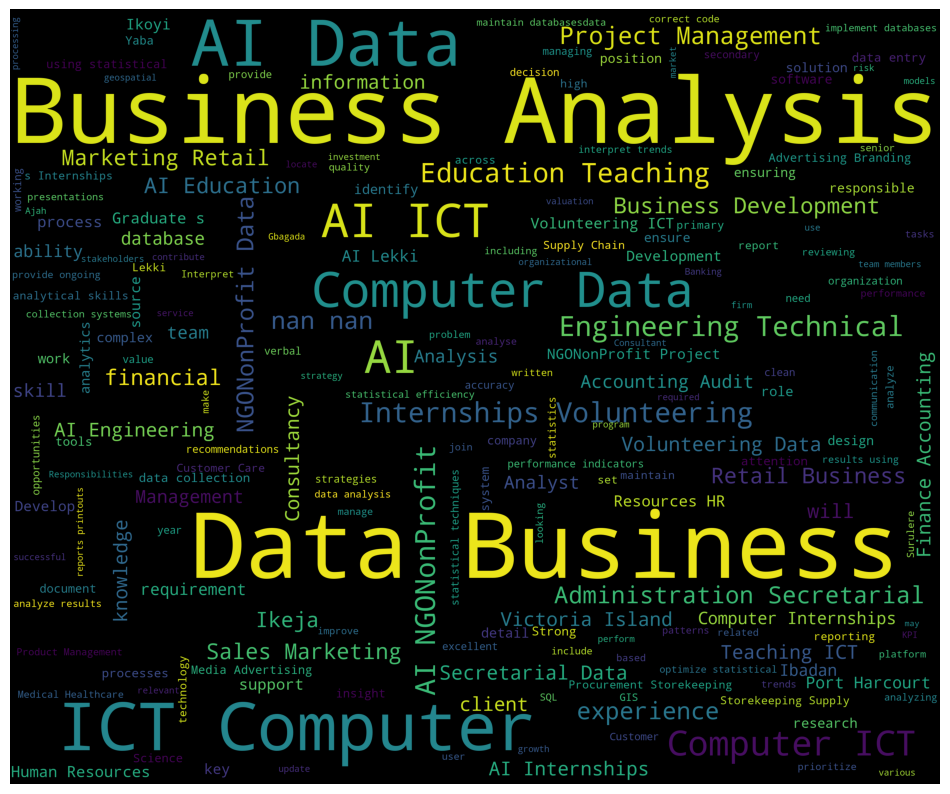

In [46]:
create_wordcloud(data)